In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 서울시 학원 교습소 정보 데이터

## 전처리

In [4]:
df = pd.read_csv("./data/서울시 학원 교습소정보.csv", encoding='euc-kr')
def f1(x):
    if x!=x:
        return np.nan
    else:
        return int(str(x)[:4])
    
df['개설년도'] = df['등록일자'].apply(f1)

# 2023년도 이전에 개설된 학원만
df = df.loc[df['개설년도']<=2023]
print(df.shape)
df.head()

(24527, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,", 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)",종합(대),NaN,"전산회계,컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",NaN,...,Y,N,2490,개원,19681227,NaN,99991231.0,19681227,20231018,1968
1,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,", 3층 일부 (제기동, 경동시장)",직업기술,산업기반기술,"전자,",전자,...,Y,N,2571,개원,19680210,NaN,99991231.0,19680210,20231018,1968
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,", 3층 301호 (휘경동, 민족통일빌딩)",예능(대),예능(중),"음악,",음악,...,Y,N,2445,개원,19720630,NaN,99991231.0,19720630,20231018,1972
3,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,", 2층,3층 (신설동)",직업기술,산업기반기술,NaN,자동차,...,Y,N,130811,개원,19720501,NaN,99991231.0,19720501,20231018,1972
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층 (묵동),입시.검정 및 보습,보통교과,"보습,",보습,...,N,N,2008,개원,19881102,NaN,99991231.0,19881102,20231018,1988


## '구'별 학원 수

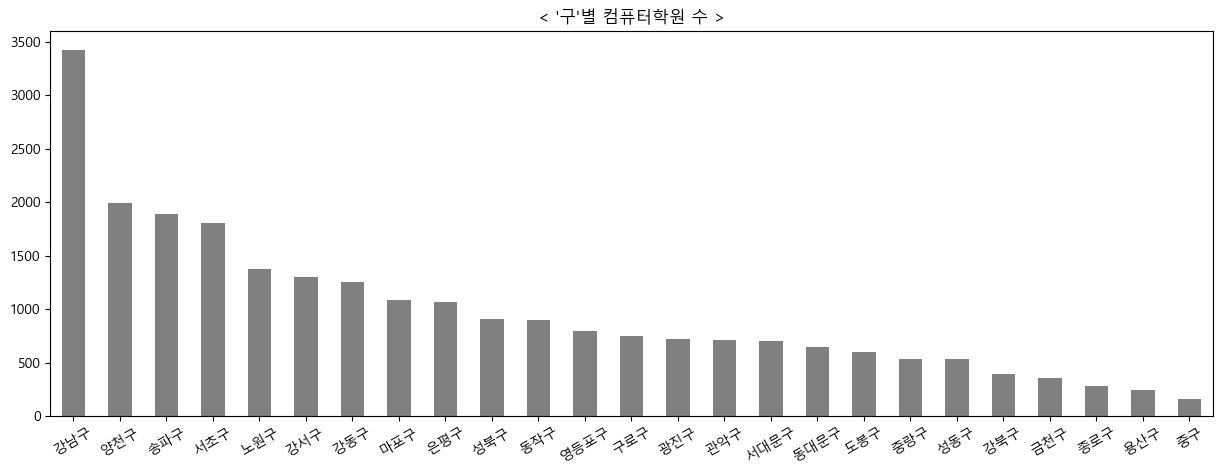

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['행정구역명'].value_counts().plot.bar(color='grey')
_=plt.xticks(rotation=30)
_=plt.xlabel("")
_=plt.title("< '구'별 컴퓨터학원 수 >")

## 분야별 학원 비율

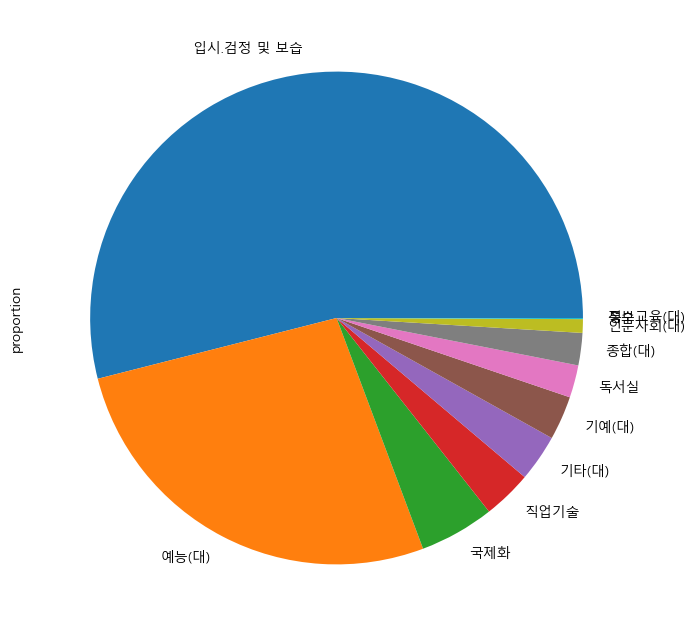

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
_=df['분야명'].value_counts(normalize=True).plot.pie(ax = ax)

## 교습계열별 학원 수

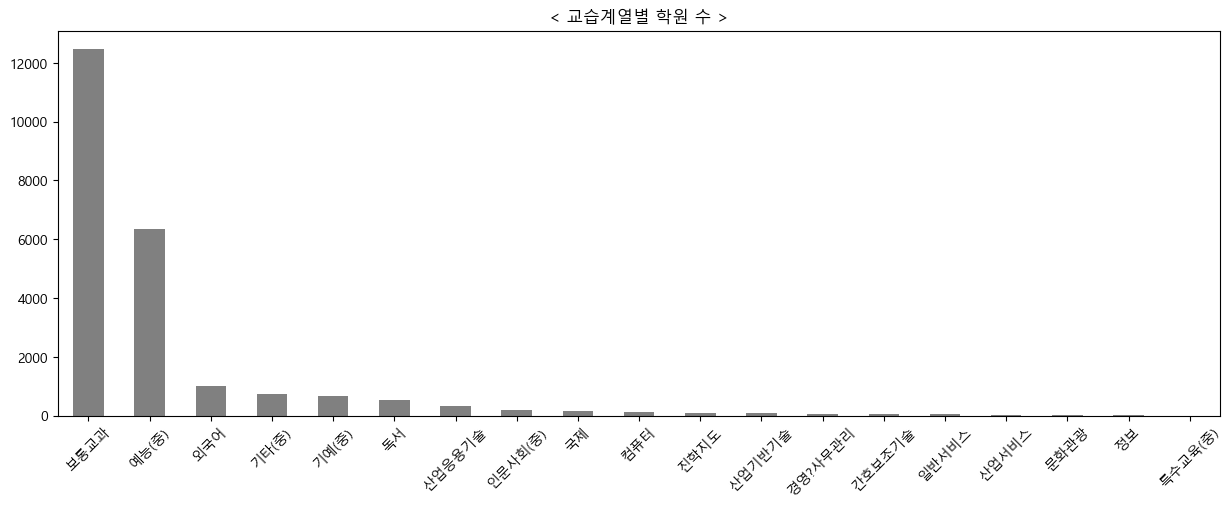

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['교습계열명'].value_counts().plot.bar(color='grey', ax=ax)
_=plt.xticks(rotation=45)
_=plt.xlabel("")
_=plt.title("< 교습계열별 학원 수 >")

## 연도별 개설 학원 수

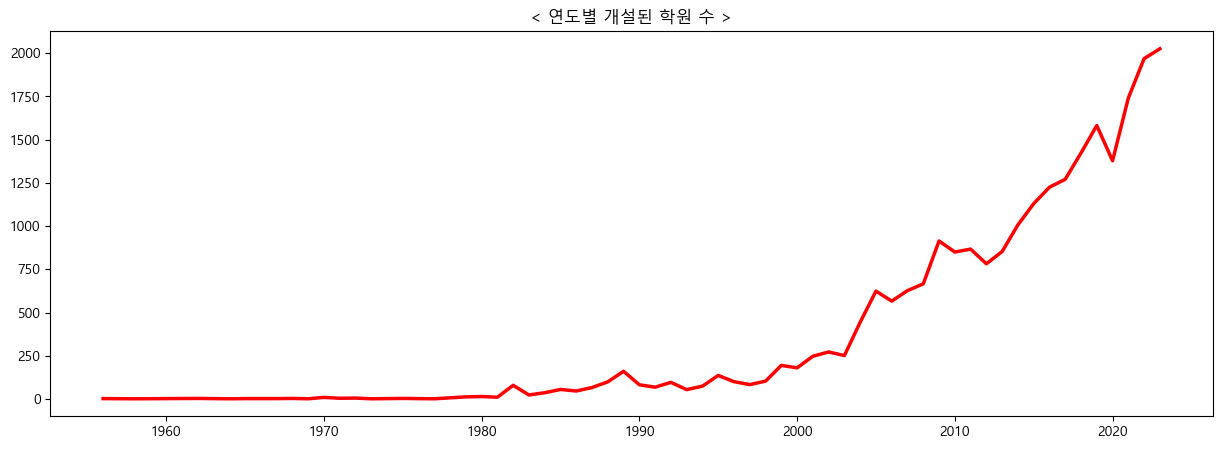

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

dfdf = df['개설년도'].value_counts().sort_index().to_frame().reset_index()
_=sns.lineplot(data = dfdf,
               x = '개설년도', y='count',
               ax=ax, linewidth=2.5, color='red')
_=plt.xlabel('')
_=plt.ylabel('')
_=plt.title("< 연도별 개설된 학원 수 >")

In [10]:
# df_20s = df.loc[(df['개설년도']>=2020)&(df['개설년도']<=2023)]
# print(df_20s.shape)
# df_20s.head()

In [11]:
# fig, ax = plt.subplots(figsize=(15,5))
# _=df_20s['교습계열명'].value_counts().plot.bar(color='grey')
# _= plt.xticks(rotation=45)
# _= plt.xlabel("")

## 연도별 개설 컴퓨터학원 수

In [13]:
com_df = df.loc[df['교습계열명']=="컴퓨터"]

print(com_df.shape)
com_df.head(2)

(127, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
78,마포구,학원,1000003668,중앙정보처리학원,서울특별시 마포구 신촌로 176,", 4층일부(401,402호),6층 (대흥동)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어),","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,4104,개원,19701230,NaN,99991231.0,19701230,20231018,1970
113,서대문구,학원,1000005850,국제컴퓨터학원,서울특별시 서대문구 통일로 157-6,", 3층 (냉천동213)",직업기술,컴퓨터,"컴퓨터(정보처리,통신기기,인터넷,소프트웨어)","컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",...,Y,N,120050,개원,19900509,NaN,99991231.0,19900509,20231018,1990


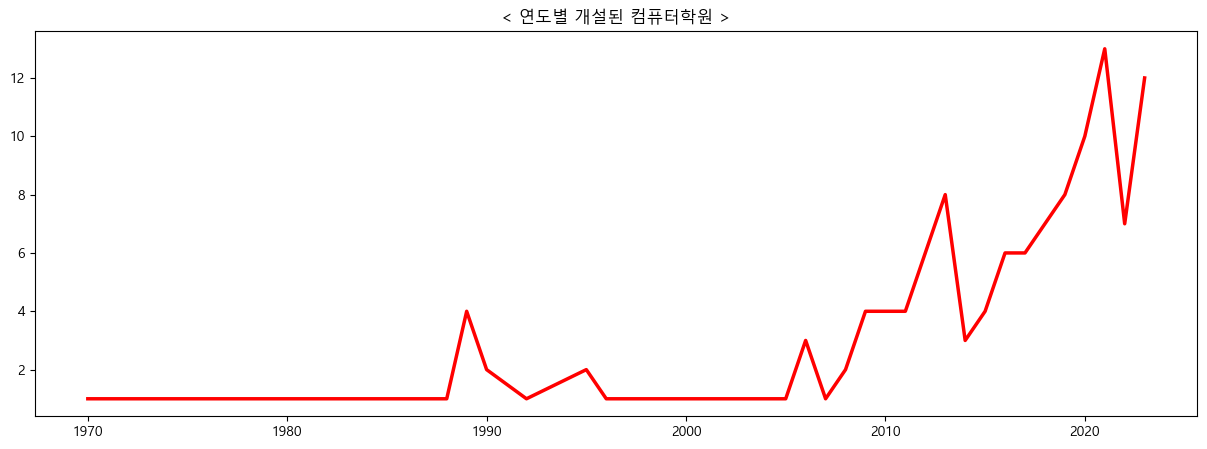

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
_=com_df['개설년도'].value_counts().sort_index().plot.line(color='red', linewidth=2.5)

_=plt.title("< 연도별 개설된 컴퓨터학원 >")
_=plt.xlabel("")

## '구'별 컴퓨터 학원 수

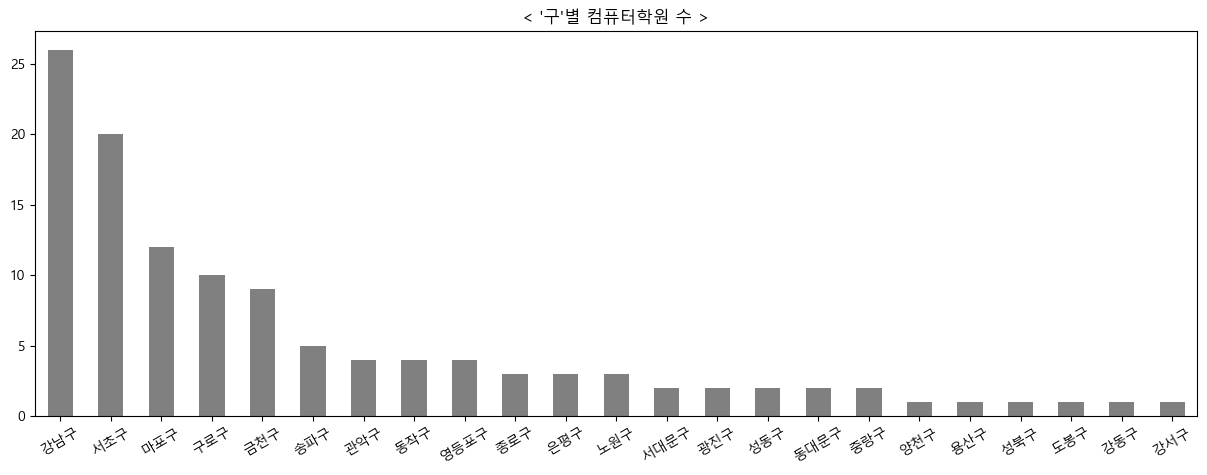

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
_=com_df['행정구역명'].value_counts().plot.bar(color='grey')
_=plt.xticks(rotation=30)
_=plt.xlabel("")
_=plt.title("< '구'별 컴퓨터학원 수 >")

# 서울시 내 '해법학원'

In [17]:
hb_df = df.loc[(df['학원명'].str.contains('해법'))|(df['학원명'].str.contains('천재'))]
hb_df.reset_index(inplace=True, drop=True)

print(hb_df.shape)
hb_df.head()

(390, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,서대문구,학원,1000008872,스마트해법수학해법영어홍제원학원,서울특별시 서대문구 통일로34길 28-6,", 2층 (홍제동)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,120854,개원,20001130,NaN,99991231.0,20001130,20240707,2000
1,구로구,학원,1000012603,해법학원,서울특별시 구로구 구로동로42길 56,", 2층 (구로동)",입시.검정 및 보습,보통교과,NaN,보습,...,Y,N,8280,개원,19951012,NaN,99991231.0,19951012,20241006,1995
2,강남구,학원,1000035422,해법수학해법영어학원,서울특별시 강남구 개포로22길 84,", 3층 (개포동)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,135961,개원,19891106,NaN,99991231.0,19891106,20231224,1989
3,강남구,학원,1000035995,해법수학교실대치학원,서울특별시 강남구 도곡로 447,", 5층 (대치동,제일빌딩)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,135999,개원,19980720,NaN,99991231.0,19980720,20240908,1998
4,강남구,학원,1000036477,청담해법수학학원,서울특별시 강남구 학동로 419,", 3층 (청담동,대륭빌딩)",입시.검정 및 보습,보통교과,"보습,",보습,...,Y,N,135951,개원,20010525,NaN,99991231.0,20010525,20231018,2001


## '구'별 해법학원 수

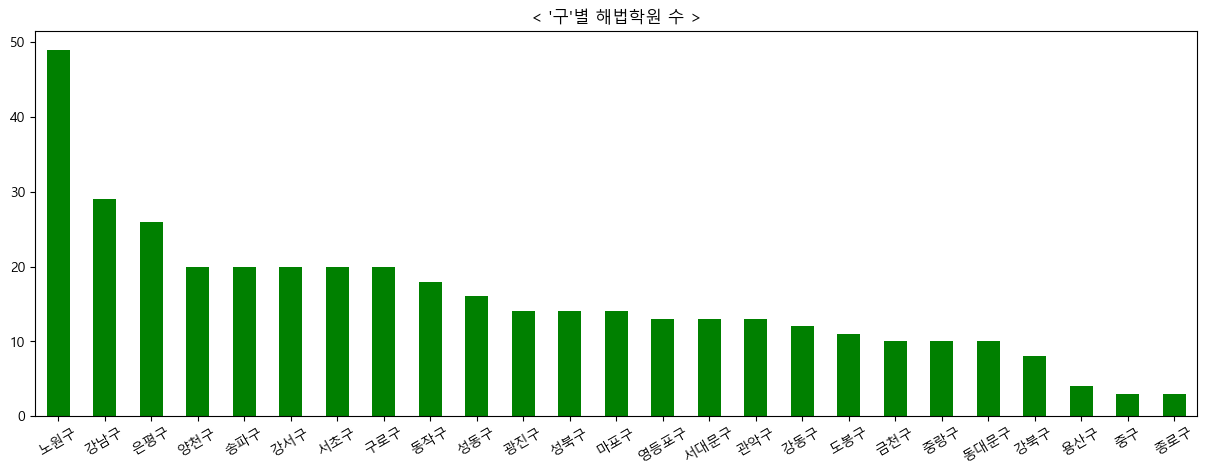

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
_= hb_df['행정구역명'].value_counts().plot.bar(color = 'green')
_= plt.xticks(rotation=30)
_= plt.xlabel("")
_= plt.title("< '구'별 해법학원 수 >")

## 연도별 개설 학원 수

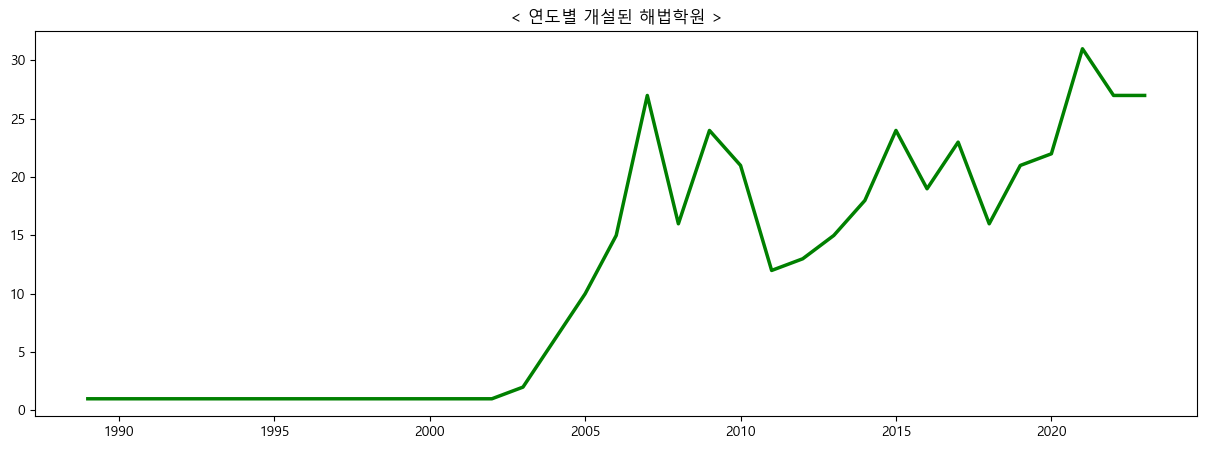

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
_=hb_df['개설년도'].value_counts().sort_index().plot.line(color='green', linewidth=2.5)
_=plt.title("< 연도별 개설된 해법학원 >")
_=plt.xlabel("")

# Folium Map

In [18]:
dfdf = pd.read_csv("../../../../data/소상공인시장진흥공단_상가(상권)정보_서울_202403.csv", index_col=False)
dfdf.head()

C:\Users\yoons\AppData\Local\Temp\ipykernel_8772\3543562003.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfdf = pd.read_csv("../../../../data/소상공인시장진흥공단_상가(상권)정보_서울_202403.csv", index_col=False)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [19]:
dfdf['상권업종대분류명'].value_counts()

상권업종대분류명
음식         132471
소매         101796
과학·기술       87533
수리·개인       47677
교육          26708
부동산         24193
시설관리·임대     21809
예술·스포츠      18977
보건의료         7776
숙박           6296
Name: count, dtype: int64

In [21]:
df_edu = dfdf.loc[dfdf['상권업종대분류명']=='교육']
df_edu.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
11,MA010120220805430870,볼벤,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,...,1144012500102140020017478,청운빌라,서울특별시 마포구 월드컵로30다길 41,121846,3965,NaN,4,NaN,126.908665,37.562237
27,MA010120220805431960,엑스퍼트짐,NaN,P1,교육,P106,기타 교육,P10605,레크리에이션 교육기관,P85613,...,1138010700101190001020532,NaN,서울특별시 은평구 응암로 269,122911,3455,NaN,2,NaN,126.918749,37.596001
39,MA010120220805432223,율립연구소,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,1171010900100000000000001,아이온스퀘어,서울특별시 송파구 위례광장로 188,138926,5849,NaN,NaN,NaN,127.142381,37.481079
66,MA010120220805433919,춤연,NaN,P1,교육,P106,기타 교육,P10613,기타 예술/스포츠 교육기관,P85629,...,1165010200100890004005455,원창빌딩,서울특별시 서초구 양재천로29길 3,137890,6747,NaN,B1,NaN,127.042226,37.479264


In [22]:
df_edu['상권업종중분류명'].value_counts()

상권업종중분류명
기타 교육    15953
일반 교육     6834
교육 지원     3921
Name: count, dtype: int64

In [23]:
df_edu['상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원           6834
요가/필라테스 학원        4390
기타 기술/직업 훈련학원     2552
기타 교육지원 서비스업      2337
그 외 기타 교육기관       1673
교육컨설팅업            1584
음악학원              1385
미술학원              1052
기타 예술/스포츠 교육기관     973
태권도/무술학원           839
외국어학원              839
직원 훈련기관            784
레크리에이션 교육기관        711
사회교육시설             221
컴퓨터 학원             220
전문자격/고시학원          155
운전학원                88
청소년 수련시설            71
Name: count, dtype: int64

In [25]:
df_edu.loc[df_edu['상호명'].str.contains('해법')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2371,MA010120220805507515,해법영어교실용마영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1121510100101380035023389,NaN,서울특별시 광진구 용마산로3길 98,143891,4926,NaN,1,NaN,127.082969,37.557349
2664,MA010120220805517697,스마트해법수학신상도점수학교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1159010200102030036033877,NaN,서울특별시 동작구 장승배기로 13,156841,7047,NaN,2,NaN,126.942814,37.499718
8574,MA010120220806141525,목동대치해법수학교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1147010200107490006020272,NaN,서울특별시 양천구 목동중앙본로 40,158816,7975,NaN,3,NaN,126.869017,37.539644
11855,MA010120220806404303,신사해법중국어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1138010900100150050044212,경오빌딩,서울특별시 은평구 갈현로1길 8,122880,3436,NaN,NaN,NaN,126.909380,37.599411
12068,MA010120220806423857,스마트해법수학교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1130510300102200018000059,NaN,서울특별시 강북구 삼각산로 147,142877,1043,NaN,2,NaN,127.020489,37.641391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470349,MA0101202311A0029049,상도해법독서논술교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1159010200103550005023737,NaN,서울특별시 동작구 성대로1길 13,156843,6959,NaN,2,NaN,126.933534,37.500968
471139,MA0101202311A0058828,휴먼시아해법영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1162010200200990000000001,파크프라자,서울특별시 관악구 난곡로 42,151017,8861,NaN,3,NaN,126.920600,37.460582
472432,MA0101202311A0044810,해법수학발산초점수학교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1150010600107140004000001,태승훼미리아파트5차,서울특별시 강서구 강서로45길 49-4,157834,7640,NaN,1,NaN,126.832862,37.547780
474680,MA0101202310A0032642,국어공작소해법국어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1150010500107460000000001,마곡엠밸리11단지,서울특별시 강서구 공항대로 124,157818,7808,NaN,1,NaN,126.821413,37.559046
